In [47]:
import pandas as pd
import numpy as np

#Plotly Packages
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

#Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

#statistical libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import pearsonr
from scipy import stats

#Regression Modelling
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#Other libraries
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [53]:
data  = pd.read_csv("/Users/khairu/PythonPractice/MedicalChargesPrediction/data.csv")
original_data = data
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data.shape

(1338, 7)

In [12]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [22]:
#Determine the distribution of charge variable

charge_dist = data["charges"].values

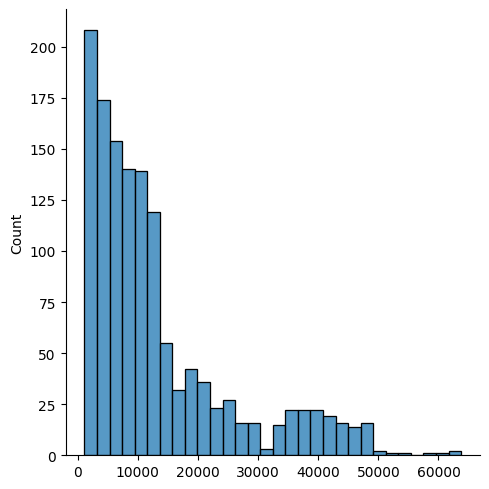

In [38]:

sns.displot(charge_dist,kde=False);


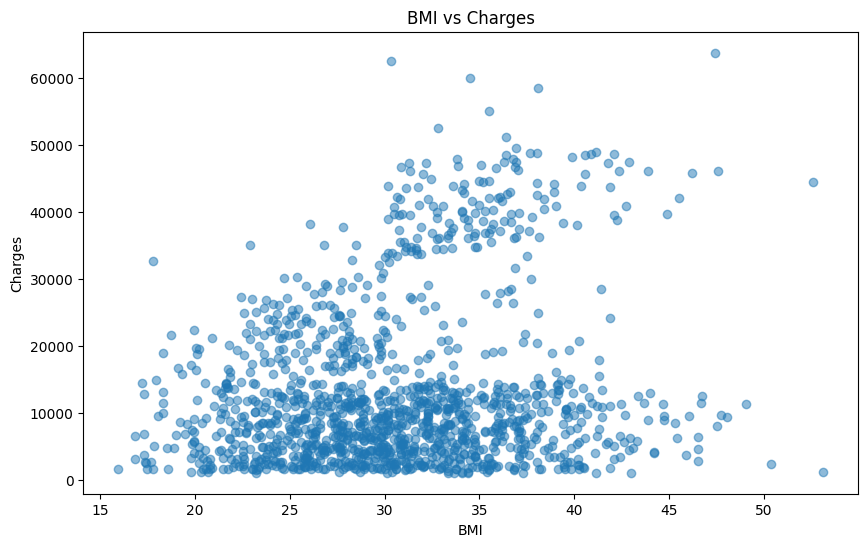

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(data['bmi'],data['charges'],alpha=0.5)
plt.title("BMI vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

In [41]:
correlation = np.corrcoef(data['bmi'],data['charges'])[0,1]
print(f'Correlation coefficient between BMI and Charges : ',{correlation})

Correlation coefficient between BMI and Charges :  {0.19834096883362895}


The correlation values between BMI and Charges indicates there is no linear relationship

In [54]:
#Create BMI groups (e.g., underweight,normal,overweight,obese)

data['bmi_group'] = np.nan
df = [data]

for col in df:
    col.loc[col["bmi"]<18.5,"bmi_group"] = "Underweight"
    col.loc[(col["bmi"]>=18.5)&(col["bmi"]<24.9),'bmi_group'] = "Normalweight"
    col.loc[(col["bmi"]>=24.9)&(col["bmi"]<29.9),'bmi_group'] = "Overweight"
    col.loc[col["bmi"]>=30,'bmi_group'] = 'Obese'

data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normalweight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


The grouped statistics can provide further insights into how charges vary within specific BMI categories.

In [55]:
grouped_stats = data.groupby('bmi_group')['charges'].agg(['mean','median'])
print('Mean and Median Charges for Each BMI Group : ')
print(grouped_stats)

Mean and Median Charges for Each BMI Group : 
                      mean       median
bmi_group                              
Normalweight  10379.499732  8604.153525
Obese         15552.335469  9964.060000
Overweight    11030.331700  8703.456000
Underweight    8852.200585  6759.262475


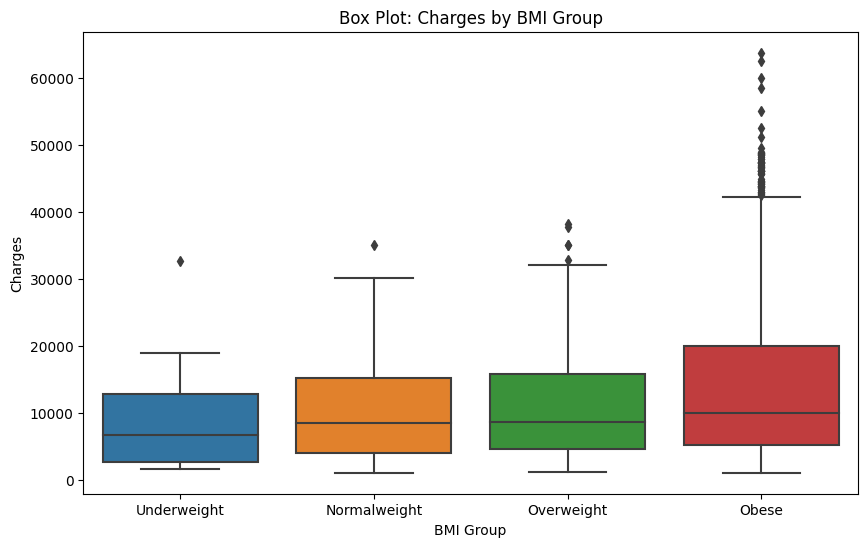

In [60]:
# Create a box plot to visualize charges by BMI group
plt.figure(figsize=(10,6))
labels = ["Underweight","Normalweight","Overweight","Obese"]
sns.boxplot(x='bmi_group',y='charges',data=data,order=labels)
plt.title('Box Plot: Charges by BMI Group')
plt.xlabel('BMI Group')
plt.ylabel('Charges')
plt.show()

Variable Effecting the Charges most

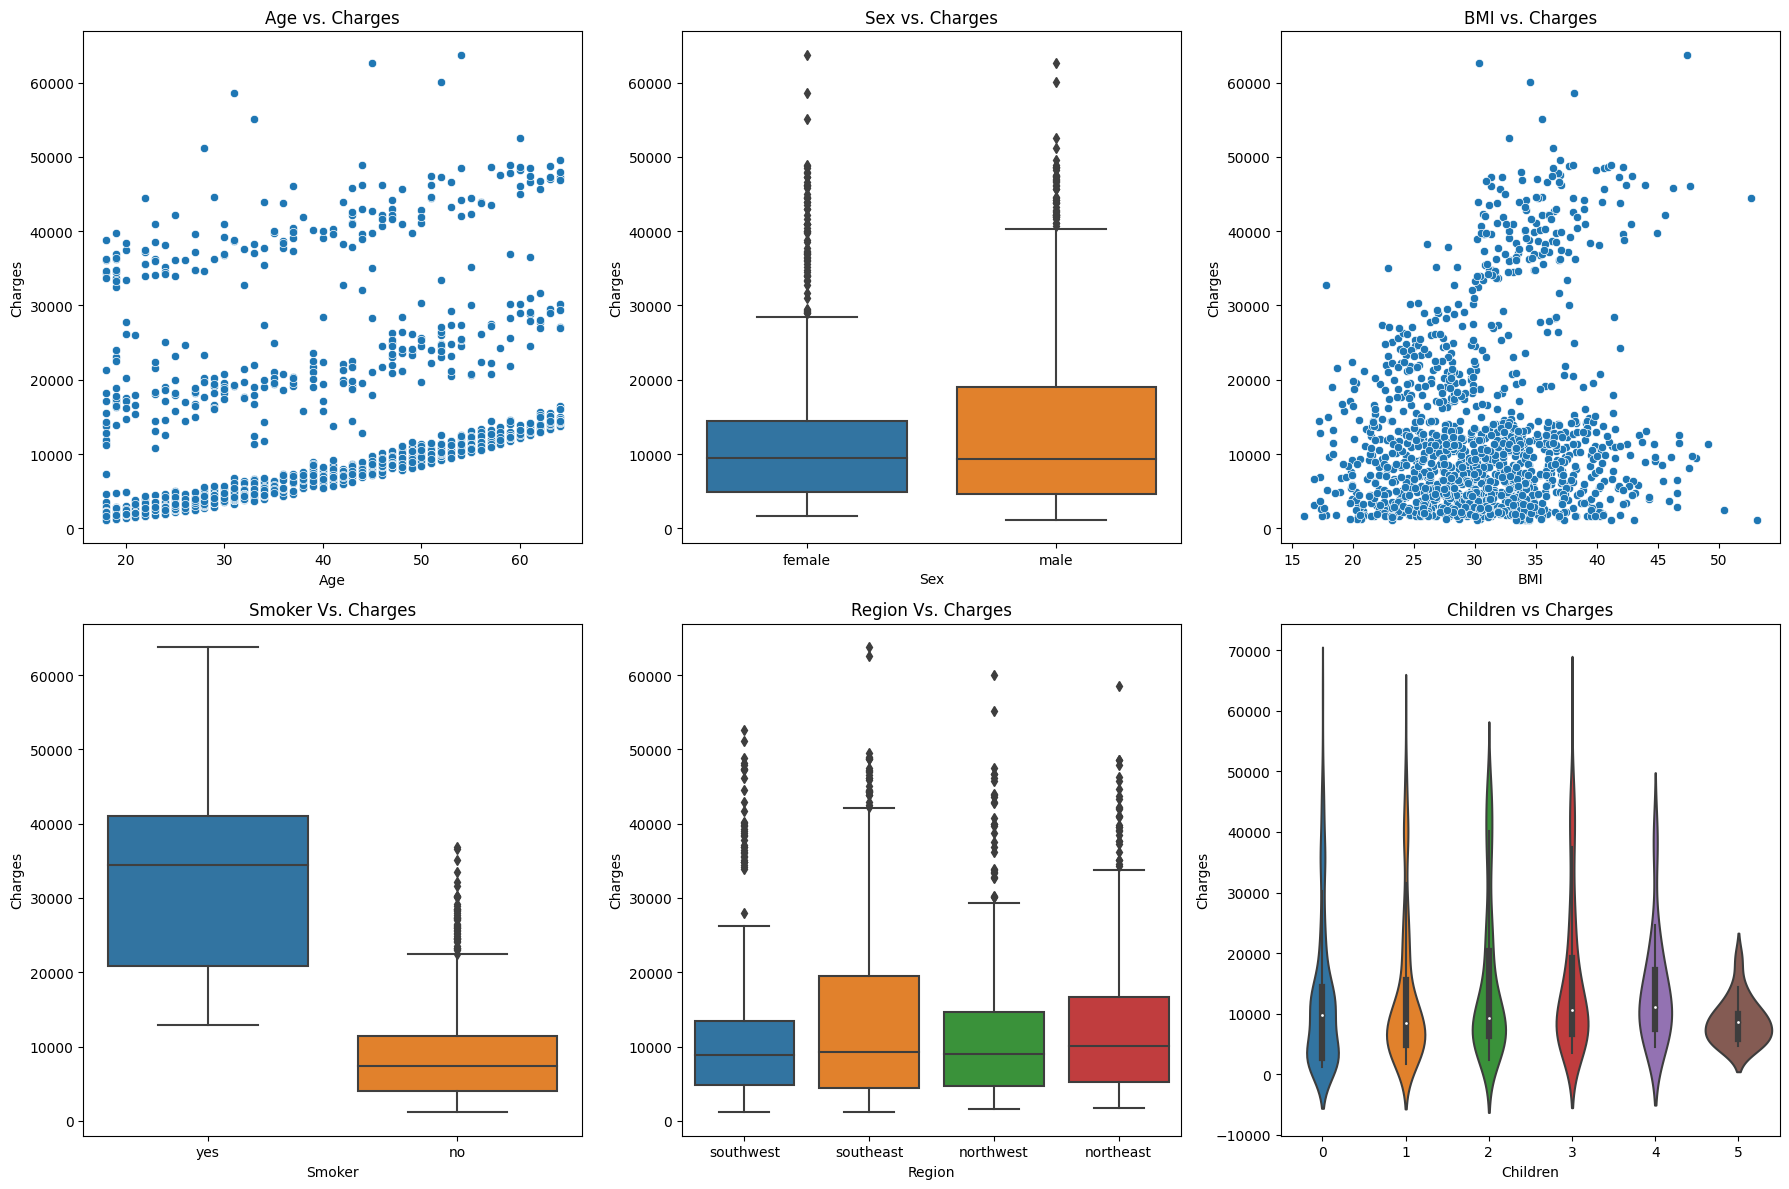

In [80]:
#Create subplots with 2 rows and 3 columns
fig,axes = plt.subplots(2,3,figsize=(18,12))

#Visualize the relationship between age and charges
sns.scatterplot(x='age',y='charges',data=data,ax=axes[0,0])
axes[0,0].set_title('Age vs. Charges')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Charges')

#Visualize the effect of sex on charges
sns.boxplot(x='sex',y='charges',data=data,ax=axes[0,1])
axes[0,1].set_title('Sex vs. Charges')
axes[0,1].set_xlabel('Sex')
axes[0,1].set_ylabel('Charges')

#Visualize the effect of BMI on charges
sns.scatterplot(x='bmi',y='charges',data=data,ax=axes[0,2])
axes[0,2].set_title("BMI vs. Charges")
axes[0,2].set_xlabel("BMI")
axes[0,2].set_ylabel("Charges")

#Visualize the effect of smoker status on charges
sns.boxplot(x='smoker',y='charges',data=data,ax=axes[1,0])
axes[1,0].set_title("Smoker Vs. Charges")
axes[1,0].set_xlabel("Smoker")
axes[1,0].set_ylabel("Charges")

#Visualize the effect of region on charges
sns.boxplot(x='region',y='charges',data=data,ax=axes[1,1])
axes[1,1].set_title("Region Vs. Charges")
axes[1,1].set_xlabel("Region")
axes[1,1].set_ylabel("Charges")


#Visualize the effect of children on charges
sns.violinplot(x='children',y='charges',data=data,ax=axes[1,2])
axes[1,2].set_title("Children vs Charges")
axes[1,2].set_xlabel("Children")
axes[1,2].set_ylabel("Charges")

#Remove the empty subplot
#fig.delaxes(axes[1,2])

#Adjust layout
plt.tight_layout()

#Show the combined figure
plt.show()

In [75]:
#Calculate the correlation coefficient between age and charges
correlation_age = np.corrcoef(data['age'],data['charges'])[0,1]
print("Correlation between Age and Charges : ",correlation_age)
  

Correlation between Age and Charges :  0.29900819333064754


Perform a t-test to compare charges between smokers and non-smokers

In [79]:
#Calculate the correlation coefficient between bmi and charges
correlation_bmi = np.corrcoef(data['bmi'],data['charges'])[0,1]
print(correlation_bmi)

0.19834096883362895


In [78]:
smoker_charges = data[data['smoker']=='yes']['charges']
non_smoker_charges = data[data['smoker']=='no']['charges']

t_stat,p_value = stats.ttest_ind(smoker_charges,non_smoker_charges)
print(f'T-test p-value for Smoker vs. Non-Smoker Charges: {p_value}')
print(f'T-test p-value for Smoker vs. Non-Smoker Charges: {t_stat}')


T-test p-value for Smoker vs. Non-Smoker Charges: 8.271435842179102e-283
T-test p-value for Smoker vs. Non-Smoker Charges: 46.66492117272371


Distribution of various properties based on Gender

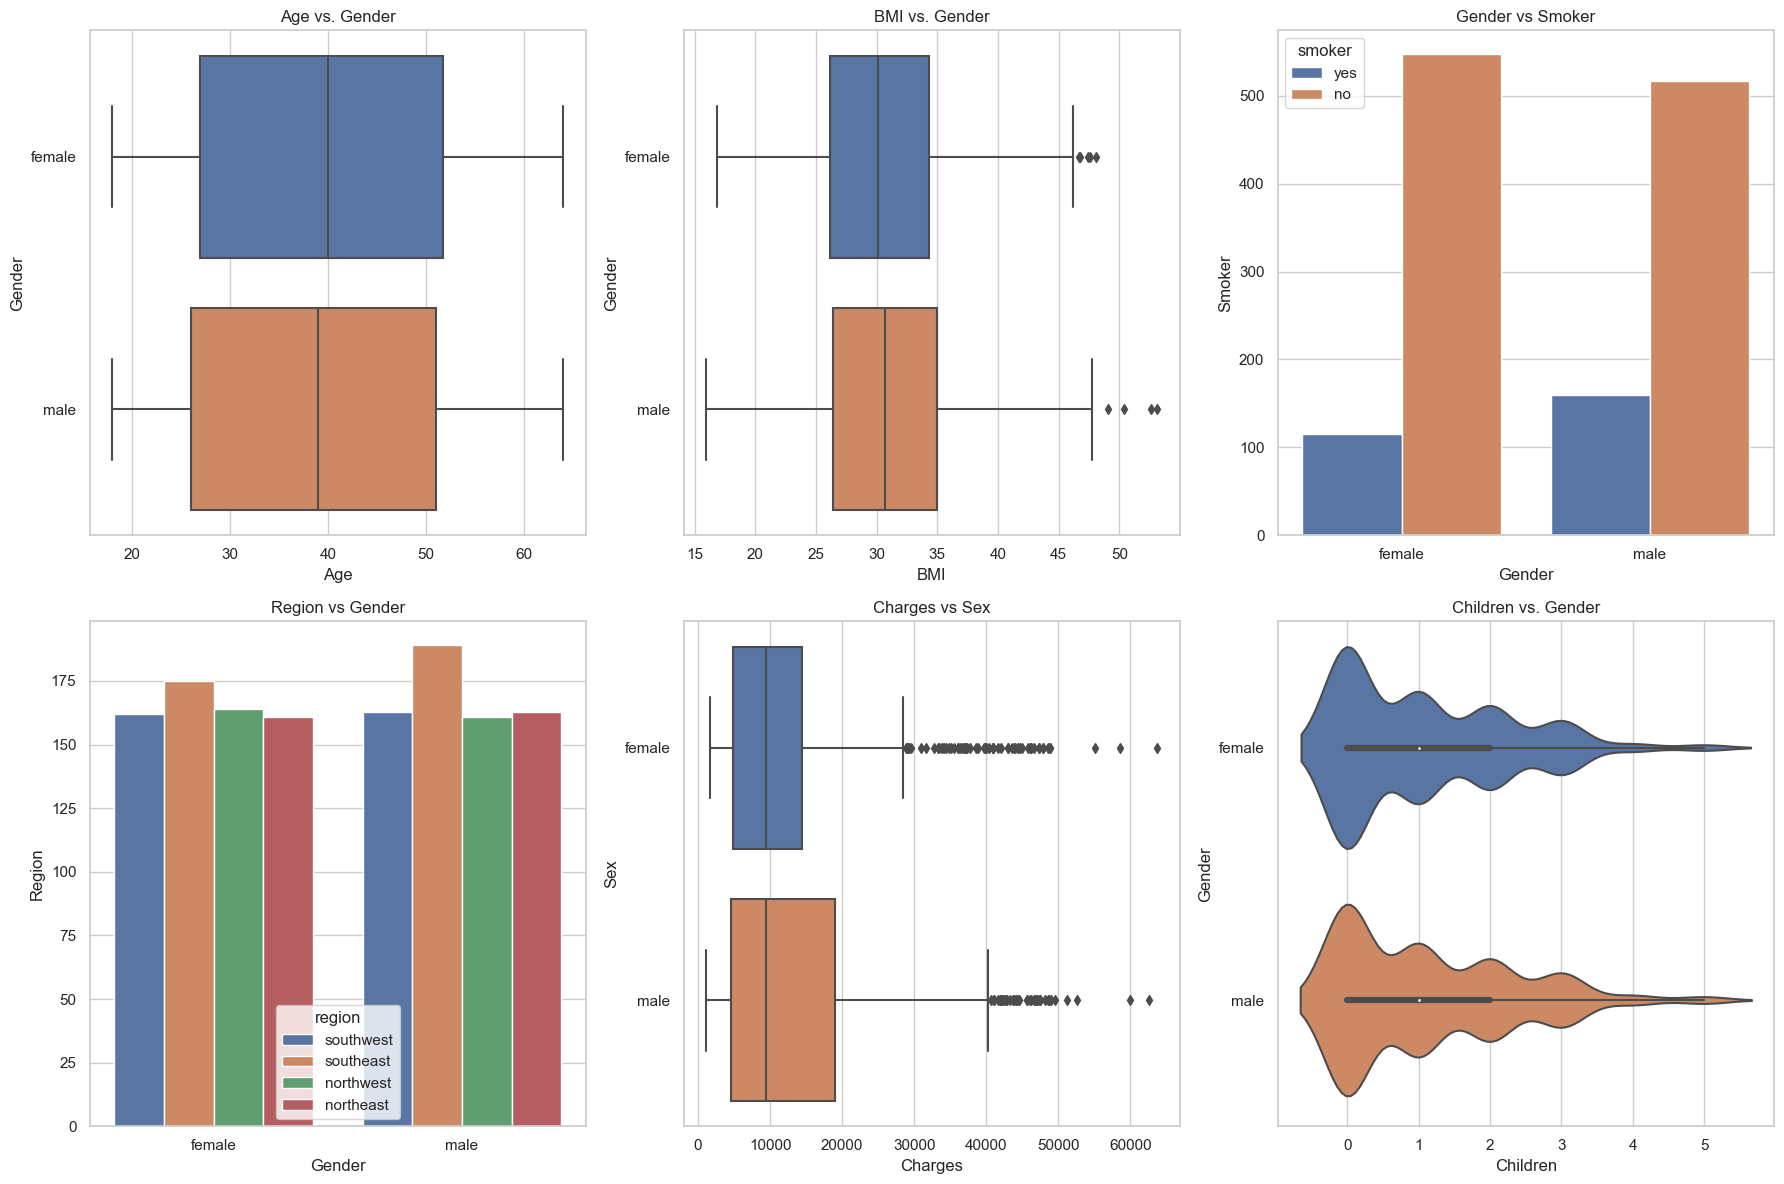

In [84]:
# Create subplots with 2 rows and 3 columns
fig,axes = plt.subplots(2,3,figsize=[18,12])

#Visualize the effect of age and gender
sns.boxplot(x='age',y='sex',data=data,ax=axes[0,0])
axes[0,0].set_title("Age vs. Gender")
axes[0,0].set_xlabel("Age")
axes[0,0].set_ylabel("Gender")

#Visualize the effect of bmi and gender
sns.boxplot(x='bmi',y='sex',data=data,ax=axes[0,1])
axes[0,1].set_title("BMI vs. Gender")
axes[0,1].set_xlabel("BMI")
axes[0,1].set_ylabel("Gender")

#Visualize the effect of smoker and gender
sns.set(style="whitegrid")
sns.countplot(x='sex',hue='smoker',data=data,ax=axes[0,2])
axes[0,2].set_title("Gender vs Smoker")
axes[0,2].set_xlabel("Gender")
axes[0,2].set_ylabel("Smoker")

#Visualize the effect of region and gender
sns.set(style="whitegrid")
sns.countplot(x='sex',hue='region',data=data,ax=axes[1,0])
axes[1,0].set_title("Region vs Gender")
axes[1,0].set_xlabel("Gender")
axes[1,0].set_ylabel("Region")

#Visualize the effect of charges and gender
sns.boxplot(x='charges',y='sex',data=data,ax=axes[1,1])
axes[1,1].set_title("Charges vs Sex")
axes[1,1].set_xlabel("Charges")
axes[1,1].set_ylabel("Sex")

#Visualize the effect of children and gender
sns.violinplot(x='children',y='sex',data=data,ax=axes[1,2])
axes[1,2].set_title("Children vs. Gender")
axes[1,2].set_xlabel("Children")
axes[1,2].set_ylabel("Gender")

plt.tight_layout()
plt.show()


Distribution of Charges for smokers and non smokers

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

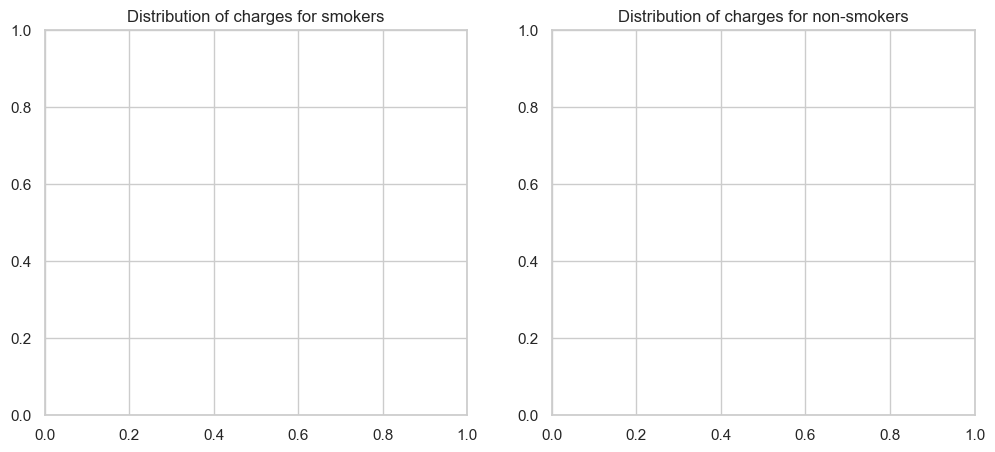

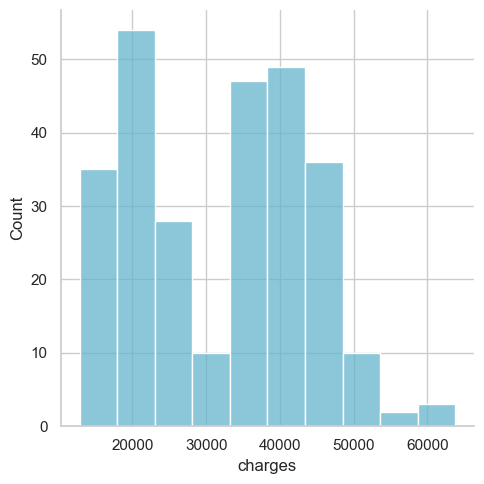

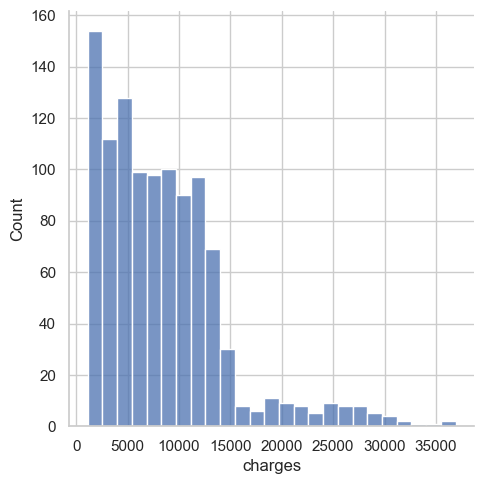

In [102]:
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(121)
sns.displot(data[(data.smoker=='yes')]['charges'],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=fig.add_subplot(122)
sns.displot(data[(data.smoker=='no')]['charges'],color='b',ax=ax)
ax.set_title("Distribution of charges for non-smokers")

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

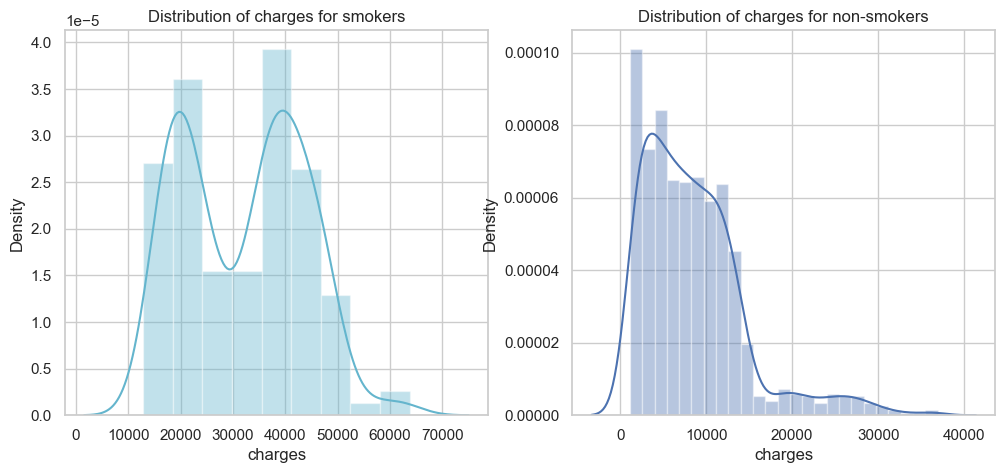

In [103]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 'yes')]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 'no')]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Perform hypothesis testing to check whether having children more children results in the fact that
people smoke less?

In [106]:
#Create a contigency table 
contigency_table = pd.crosstab(data['children'],data['smoker'])

#Perform the chi-square test
chi2,p,_,_ = stats.chi2_contingency(contigency_table)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value : {p}')

#Set the significance level (alpha)
alpha = 0.05

#Check if the p-value is less than alpha to make a decision 
if p<alpha:
    print("Reject the null hypothesis: There is an association between the number of children and smoking status")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the number of children and smoking status")

Chi-Square Statistic: 6.887719904947631
p-value : 0.22912555089568779
Fail to reject the null hypothesis: There is no significant association between the number of children and smoking status
